# **Project Milestone 4**
# Topic: CNC Machining
# Group #72

[Link to Data source](https://github.com/boschresearch/CNC_Machining/tree/main)

**Table of contents to be added**



**1. Problem Statement Refinement and Introduction**

***Introduction:***

CNC milling machines are critical to metalworking industries, performing versatile tasks such as cutting, drilling, and shaping metal parts. However, machine downtime due to tool failures or defective operations can significantly disrupt production, leading to costly delays. This project leverages time-series data from 3-axis accelerometers mounted on CNC milling machines to detect anomalies that may indicate potential failures, enabling early intervention to minimize downtime.

***Refined Problem Statement:***

Can time-series analysis of 3-axis accelerometer data from CNC milling machines be used to predict anomalies or failures that lead to defective parts or machine downtime? The goal is to develop a predictive model that identifies "bad" operations (defective outcomes) with high accuracy, despite the challenges of varying operation durations and imbalanced data.

***Significance:***

Exploratory data analysis (EDA) revealed that only 70 out of 1.7K operations resulted in defective parts, highlighting a severe class imbalance that complicates anomaly detection. The absence of zero values in the data suggests reliable sensor performance, but varying operation durations (13.4 to 158.7 seconds) necessitate careful preprocessing to standardize inputs or adopt flexible modeling approaches. These insights emphasize the need for robust feature engineering and models tailored to time-series anomaly detection, as early detection of defects can save significant time and resources in production environments.

**2. Comprehensive EDA Review**

***Key EDA Findings:***

The dataset comprises 3-axis accelerometer readings from three CNC milling machines, each performing 14 distinct operations, totaling 1.7K operations. The sensors capture 2000 readings per second, with operation durations ranging from 13.4 to 158.7 seconds, resulting in arrays of varying lengths. Acceleration values range between 636 and 6552 units across all axes, with no zero values, indicating consistent sensor functionality. Notably, only 70 operations are labeled "bad," compared to 1630 "good" operations, revealing a significant class imbalance. The lack of timestamps assumes consecutive readings without missing data.

***Feature Engineering Process:***

 *    ****Standardization of Input Size:**** Due to varying operation durations, one approach is to resample or truncate data to a fixed length for consistent model input. Alternatively, a sliding window approach was considered to accommodate variable lengths, preserving temporal patterns.



 *    ****Frequency Domain Features:**** EDA highlighted the importance of frequency in vibration data. Fast Fourier Transform (FFT) was proposed to extract frequency components, as changes in frequency may indicate tool wear or breakage.



 *    ****Jerk Calculation:**** The rate of change of acceleration (jerk) was identified as a potential feature to capture sudden movements, such as those caused by tool failures.



 * ****Justification:**** These features were chosen based on EDA insights into the time-series nature of the data and the need to detect subtle anomalies in vibration patterns. Frequency and jerk features align with the physical dynamics of CNC operations, where anomalies often manifest as irregular vibrations.

****Visualizations:****
*   Histograms of operation durations showed a wide range, justifying the need for flexible input handling.
*   Plots of acceleration readings over time for "good" vs. "bad" operations revealed higher amplitude spikes in some "bad" cases, supporting amplitude-based feature engineering.
*   Frequency spectra (via FFT) for sample operations indicated distinct patterns in "bad" operations, reinforcing the use of frequency-domain features.

These analytical decisions link to the project goal of early anomaly detection by focusing on features that capture the physical characteristics of machine failures.

**3. Baseline Model Selection and Justification**

***Model Choice:***

A heuristic filter was selected as the baseline model, classifying operations as "good" or "bad" based on amplitude (>4750 units) and duration (< 19 seconds) thresholds. This model was chosen for its simplicity, interpretability, and ability to serve as a starting point for evaluating vibration data. It avoids complex assumptions, making it suitable for initial testing on imbalanced time-series data.

**Training Process:**

*    ***Preprocessing:*** Raw accelerometer data was processed to extract amplitude and duration metrics for each operation. No additional transformations (e.g., normalization) were applied at this stage.
* ***Parameters:*** Fixed thresholds (amplitude >4750, duration < 19s) were set based on EDA observations of "bad" operation characteristics.
* ***Evaluation Metrics:*** The model was evaluated using accuracy, precision, recall, and F1-score, with a focus on performance for the minority "bad" class due to class imbalance.

**Initial Results:**
The model achieved 95% overall accuracy, with strong performance on "good" operations (97% precision, 98% recall). However, it struggled with "bad" operations (33% precision, 20% recall, 25% F1-score). The confusion matrix showed 1604 correct "good" predictions and 14 correct "bad" predictions, with 56 "bad" cases misclassified as "good." These results align with expectations for a simple heuristic model, given the class imbalance and lack of sophisticated feature engineering.

**4. Results Interpretation and Analysis**

***Performance Analysis:***
The baseline model’s high overall accuracy (95%) is misleading due to the imbalanced dataset, as it excels at predicting the majority "good" class but performs poorly on the critical "bad" class (25% F1-score). The low recall (20%) for "bad" operations indicates that many defective operations are missed, which is problematic for the goal of early anomaly detection. The confusion matrix confirms that 56 out of 70 "bad" operations were incorrectly classified, underscoring the model’s limitations.

***Strengths and Weaknesses:***

* **Strengths:** The model is computationally efficient, easy to interpret, and provides a clear benchmark for future models. Its high precision and recall for "good" operations demonstrate reliability in identifying normal behavior.
* **Weaknesses:** The model’s reliance on fixed thresholds fails to capture complex temporal patterns in time-series data. It is particularly ineffective for the minority class, likely due to class imbalance and insufficient feature engineering.

***Proposed Improvements:***

* ***Address Class Imbalance:*** Techniques like oversampling (e.g., SMOTE), undersampling, or anomaly detection models (e.g., autoencoders) could improve "bad" class performance.
* ***Incorporate Time-Series Models:*** Models like Recurrent Neural Networks (RNNs) or Long Short-Term Memory (LSTM) networks could better capture temporal dependencies in the data.
* ***Enhance Feature Engineering:*** Adding FFT-based frequency features and jerk calculations may improve the model’s ability to detect subtle anomalies.
* ***Iterative Threshold Tuning:*** Dynamic or data-driven thresholds could replace fixed values to adapt to varying operation characteristics.

**5. Final Model Pipeline Setup**

The final model pipeline is under development, with the following preliminary components:
* ***Preprocessing:*** Standardize input sizes via resampling or sliding windows, compute FFT and jerk features, and normalize data to ensure consistency.

* ***Model Selection:*** Explore anomaly detection models (e.g., autoencoders) and time-series models (e.g., LSTM) to address class imbalance and temporal patterns. Trial models, such as Short-Time Fourier Transform (STFT) combined with Convolutional Neural Networks (CNN), show promising results, with ongoing analysis of hot zone features to identify distinguishing characteristics of "good" and "bad" operations.

* ***Evaluation:*** Focus on F1-score and ROC-AUC, prioritizing "bad" class performance to ensure effective anomaly detection.
Assumptions include reliable sensor data and no missing readings. Parameter tuning and model refinement will be finalized in the next milestone.

## Model list

The following models are at various stages of testing and implementation as of milestone 4. The code for the baseline model has been implemented to provide the minimium performance all future models must exceed. Code for the ANN using RFFT has also been provided to demonstrate the working functionality of our data pipeline on a simple network. The rest of the model list includes potential models that the team is actively exploring.



1. **Base line model** - Using heuristic filters

        a. Input data: Acceleration

        b. Result: F1: 0.25

2. **ANN using RFFT**
        a. Input: extracting the freq with the highest magnitude and feeding it
        into an ANN. Using SMOT to upsample

        Khaled's Output
            Accuracy: 0.9757
            Precision: 0.5608
            Recall: 0.9714
            F1-Score: 0.7111
            AUC: 0.9931


3. **RNN/GRU/LSTM**
        a. Input: Windowed accelration data. Upsampling will be a challange?


4. **CNN**

        a. Input: Use the CNN on a window of STFT and treat it like an image.
        imageGenerator is an option for upsampling?


4. **Autoencoders - measuring the reconstruction error**

  4.1 - **ANN-RFFT Auto Encoder**

        a. Input: use RFFT to feed into ANN model (Not Time Series)
        Khaled:
          couldn't get MSE to go below 0.4, which resulted in bad performance. Tried multiple archetectures, activations and batch sizes. Even though autoencoders do dimentionality reduction, tried PCA which dident improve/degrade performance.

  4.2 - **Time series autoencoder using RNN/LSTM/GRU**

        a. Input: use windowed accelration/STFT data to feed into one of the models and reconstruct the seq

   4.3 - **1D CNN**

        a. Input: windowed accelration data/STFT

  4.4 - **Transformers**

        a. Input: acceleration


## Imports

In [1]:
import os
import sys
import pickle
from pathlib import Path
from contextlib import redirect_stdout
from io import StringIO
from collections import Counter
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Literal
from IPython.display import clear_output
from scipy.signal import stft, resample
from scipy.fft import rfft, rfftfreq
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import h5py
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import (
    Dense, Dropout, LeakyReLU, SimpleRNN, GRU, LSTM, LayerNormalization,
    UpSampling1D, Conv1D, MaxPooling1D, Flatten, BatchNormalization,
    GlobalAveragePooling1D, Bidirectional
)
from tensorflow.keras.metrics import Precision, Recall, AUC

try:
  import imblearn
except:
  !pip install imblearn
  import imblearn

try:
  import gdown
except:
  !pip install gdown
  import gdown

# file_id = "1NpVQmQlylyOr0JvK74_baBCQa4daxs8b"
# destination = "CNC_Machining_main.zip"

# # Downloading the data and unzipping it in this runtime, fir the file doesnt already exist
# # the > /dev/null 2>&1 is to supress the output
# if not os.path.exists(destination):
#   !gdown --fuzzy "https://drive.google.com/uc?export=download&id=$file_id" -O $destination > /dev/null 2>&1
#   !unzip -q $destination -d /content


2025-04-28 00:21:27.775228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-28 00:21:27.775269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-28 00:21:27.775948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 00:21:27.781121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Helper functions from original research group

In [2]:
def find_all_h5s_in_dir(s_dir: os.PathLike):
    """
    list all .h5 files in a directory
    """

    fileslist = []
    for root, dirs, files in os.walk(s_dir):
        for file in files:
            if file.endswith(".h5"):
                fileslist.append(file)
    return fileslist


def load_tool_research_data(data_path: os.PathLike, label: Literal["good","bad"], add_additional_label: bool =True):
    """
    load data (good and bad) from the research data storages

    Keyword Arguments:
            data_path {str} -- [path to the directory]
            label {str} -- ["good" or "bad"]
            add_additional_label {bool} -- [if true the labels will be in the form of "Mxx_Aug20xx_OPxx_sampleNr_label" otherwise "label"] (default: True)
            verbose {bool}

        Returns:
            datalist --  [list of the the X samples]
            label --  [list of the the y labels ]
    """
    datalist = []
    data_label = []
    number_empty_folders=0

    # list all .h5 files
    list_paths = find_all_h5s_in_dir(data_path)
    list_paths.sort()

    for element in list_paths:
        # check if additional label needed ("Mxx_Aug20xx_Tool,nrX")
        if add_additional_label:
            add_label = element.split('/')[-1]
            additional_label = add_label[:-3] + "_" + label
        else:
            additional_label = label
        # extract data X and y
        with h5py.File(os.path.join(data_path, element), 'r') as f:
            vibration_data = f['vibration_data'][:]
        datalist.append(vibration_data)
        data_label.append(additional_label)

    return datalist, data_label


def datafile_read(file: os.PathLike, plotting=True):
    """loads and plots the data from the datafile

    Keyword Arguments:
        file {str} -- [path of the file]

    Returns:
        ndarray --  [raw data original]
    """
    with h5py.File(file, 'r') as f:
        vibration_data = f['vibration_data'][:]
    # interpolation for x axis plot
    freq = 2000
    samples_s = len(vibration_data[:, 0]) / freq
    samples = np.linspace(0, samples_s, len(vibration_data[:, 0]))

    # plotting
    if plotting:
        plt.figure(figsize=(20, 5))
        plt.plot(samples, vibration_data[:, 0], 'b')
        plt.ylabel('X-axis Vibration Data')
        plt.xlabel('Time [sec]')
        plt.locator_params(axis='y', nbins=10)
        plt.grid()
        plt.show()
        plt.figure(figsize=(20, 5))
        plt.plot(samples, vibration_data[:, 1], 'b')
        plt.ylabel('Y-axis Vibration Data')
        plt.xlabel('Time [sec]')
        plt.locator_params(axis='y', nbins=10)
        plt.grid()
        plt.show()
        plt.figure(figsize=(20, 5))
        plt.plot(samples, vibration_data[:, 2], 'b')
        plt.ylabel('Z-axis Vibration Data')
        plt.xlabel('Time [sec]')
        plt.locator_params(axis='y', nbins=10)
        plt.grid()
        plt.show()
    return vibration_data

# EDA

## Load and visualize the sensor data

In [ ]:
# Add the utils directory to the system path
sys.path.append('/content/utils')

# Import data_loader_utils
# import data_loader_utils

# Define dataset parameters
machines = ["M01", "M02", "M03"]
process_names = ["OP00", "OP01", "OP02", "OP03", "OP04", "OP05", "OP06", "OP07", "OP08", "OP09", "OP10", "OP11", "OP12", "OP13", "OP14"]
labels = ["good", "bad"]
path_to_dataset = Path('/content/data').absolute()

# Initialize lists for data and labels
X_data = []
y_data = []

# Suppress output during loading
with redirect_stdout(StringIO()):
    for process_name, machine, label in itertools.product(process_names, machines, labels):
        data_path = os.path.join(path_to_dataset, machine, process_name, label)
        if not os.path.exists(data_path) or not os.path.isdir(data_path):
            continue

        data_list, data_label = load_tool_research_data(data_path, label=label)
        X_data.extend(data_list)
        y_data.extend(data_label)

# Print only the final results
print(f"Total samples loaded into X_data: {len(X_data)}")
print(f"Total labels loaded into y_data: {len(y_data)}")

Total samples loaded into X_data: 1702
Total labels loaded into y_data: 1702


In [ ]:
# Sampling frequency
sampling_rate = 2000  # 2 kHz (2000 samples per second)

# Separate good and bad data
good_indices = [i for i, label in enumerate(y_data) if label.endswith("_good")]
bad_indices = [i for i, label in enumerate(y_data) if label.endswith("_bad")]

good_X_data = [X_data[i] for i in good_indices]
bad_X_data = [X_data[i] for i in bad_indices]

# Calculate durations in seconds
good_durations = [len(sample) / sampling_rate for sample in good_X_data]
bad_durations = [len(sample) / sampling_rate for sample in bad_X_data]

# Compute min, max, and average durations
good_min_duration = min(good_durations) if good_durations else 0
good_max_duration = max(good_durations) if good_durations else 0
good_avg_duration = np.mean(good_durations) if good_durations else 0

bad_min_duration = min(bad_durations) if bad_durations else 0
bad_max_duration = max(bad_durations) if bad_durations else 0
bad_avg_duration = np.mean(bad_durations) if bad_durations else 0

# Print the results
print("\nDuration Range for Good Data (seconds):")
print(f"  Minimum: {good_min_duration:.2f} seconds")
print(f"  Maximum: {good_max_duration:.2f} seconds")
print(f"  Average: {good_avg_duration:.2f} seconds")

print("\nDuration Range for Bad Data (seconds):")
print(f"  Minimum: {bad_min_duration:.2f} seconds")
print(f"  Maximum: {bad_max_duration:.2f} seconds")
print(f"  Average: {bad_avg_duration:.2f} seconds")

# Plot the time distribution
plt.figure(figsize=(10, 6))
plt.hist(good_durations, bins=30, alpha=0.5, label='Good Data', color='green')
plt.hist(bad_durations, bins=30, alpha=0.5, label='Bad Data', color='red')
plt.title('Time Distribution of Good and Bad Data')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Duration Range for Good Data (seconds):
  Minimum: 18.43 seconds
  Maximum: 158.72 seconds
  Average: 53.00 seconds

Duration Range for Bad Data (seconds):
  Minimum: 13.40 seconds
  Maximum: 130.00 seconds
  Average: 40.14 seconds


It's evident that the dataset is imbalanced. With 1,632 instances of good data and 70 instances of bad data, the bar chart above illustrates the red areas representing the bad data and the green areas representing the good data. In this duration and frequency bar chart, it appears that most of the data points are below 50 seconds in length.

In the following seciton we further explored the differences between operation times in the following plot. The smallest operation duration was 13.4 seconds and the largest operation duration was 158.7 seconds. Since each operation duration is different, certain decisions need to be made about preprocessing and the architecture of the network.

One approach would be to choose a fixed window of time to break the data into. This methodology would be flexible for a wide range of networks. However, there are difficulties in choosing an appropriate window size that would capture the relationships of the good and bad results. The fixed window may also not generalize well in the case where an anomoly which exceeds tot window is encountered during operation.

Another approach would be to select a network architecture such as an RNN or LSTM which can handle streamed, sequential data and is not bound to a fixed window.

Further exploration into both approaches will be conducted in future milestones.

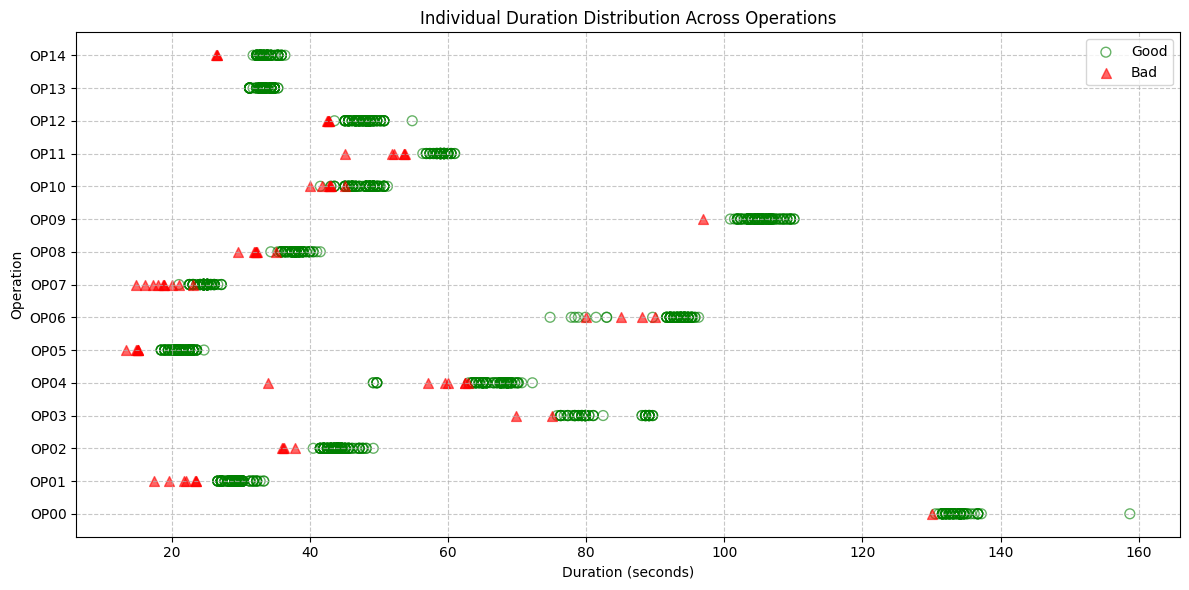


Time Range Between Different Operations (seconds):
OP00:
  Good - Min: 130.56, Max: 158.72, Avg: 133.90, Count: 83
  Bad  - Min: 130.00, Max: 130.00, Avg: 130.00, Count: 1
OP01:
  Good - Min: 26.62, Max: 33.28, Avg: 29.18, Count: 136
  Bad  - Min: 17.45, Max: 23.54, Avg: 21.55, Count: 7
OP02:
  Good - Min: 40.45, Max: 49.15, Avg: 43.90, Count: 148
  Bad  - Min: 35.86, Max: 37.87, Avg: 36.48, Count: 4
OP03:
  Good - Min: 75.78, Max: 89.60, Avg: 81.99, Count: 68
  Bad  - Min: 69.83, Max: 75.00, Avg: 72.41, Count: 2
OP04:
  Good - Min: 49.15, Max: 72.19, Avg: 65.92, Count: 105
  Bad  - Min: 33.87, Max: 62.88, Avg: 56.87, Count: 7
OP05:
  Good - Min: 18.43, Max: 24.62, Avg: 21.25, Count: 114
  Bad  - Min: 13.40, Max: 15.10, Avg: 14.71, Count: 6
OP06:
  Good - Min: 74.75, Max: 96.26, Avg: 92.24, Count: 84
  Bad  - Min: 80.00, Max: 90.00, Avg: 85.77, Count: 4
OP07:
  Good - Min: 20.99, Max: 27.14, Avg: 24.75, Count: 148
  Bad  - Min: 14.74, Max: 23.00, Avg: 18.64, Count: 10
OP08:
  Good - M

In [ ]:
# New Section: Check Time Range Between Different Operations (Scatter Plot of Individual Durations)

# Sampling frequency (already defined, but included for clarity)
sampling_rate = 2000  # 2 kHz (2000 samples per second)

# Dictionary to store durations with good/bad distinction
operation_durations = {op: {'good': [], 'bad': []} for op in process_names}

# Calculate durations and group by operation and label
for i, (sample, label) in enumerate(zip(X_data, y_data)):
    # Extract operation name from the label (e.g., "M01_Aug_2019_OP00_000_good" -> "OP00")
    operation = None
    for op in process_names:
        if op in label:
            operation = op
            break
    if operation is None:
        continue  # Skip if operation not found in label

    # Determine if good or bad from label
    quality = 'good' if 'good' in label.lower() else 'bad'

    # Calculate duration in seconds
    duration = len(sample) / sampling_rate
    operation_durations[operation][quality].append(duration)

# Prepare data for plotting
plt.figure(figsize=(12, 6))

# Plot individual durations for each operation
y_positions = range(len(process_names))
for i, operation in enumerate(process_names):
    good_durations = operation_durations[operation]['good']
    bad_durations = operation_durations[operation]['bad']

    # Plot good durations as green empty circles
    if good_durations:
        plt.scatter(good_durations, [i] * len(good_durations),
                    facecolors='none', edgecolors='green', marker='o', s=50, alpha=0.6, label='Good' if i == 0 else None)

    # Plot bad durations as red triangles
    if bad_durations:
        plt.scatter(bad_durations, [i] * len(bad_durations),
                   color='red', marker='^', s=50, alpha=0.6, label='Bad' if i == 0 else None)

# Customize the plot
plt.yticks(y_positions, process_names)
plt.xlabel('Duration (seconds)')
plt.ylabel('Operation')
plt.title('Individual Duration Distribution Across Operations')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics for reference
print("\nTime Range Between Different Operations (seconds):")
for operation in process_names:
    good_durs = operation_durations[operation]['good']
    bad_durs = operation_durations[operation]['bad']

    if not (good_durs or bad_durs):
        print(f"{operation}: No data available")
        continue

    print(f"{operation}:")
    if good_durs:
        print(f"  Good - Min: {min(good_durs):.2f}, Max: {max(good_durs):.2f}, Avg: {np.mean(good_durs):.2f}, Count: {len(good_durs)}")
    if bad_durs:
        print(f"  Bad  - Min: {min(bad_durs):.2f}, Max: {max(bad_durs):.2f}, Avg: {np.mean(bad_durs):.2f}, Count: {len(bad_durs)}")

The scatter plot highlights a notable outlier in OP00, with a good data point at 158 seconds, standing out against the majority of durations that cluster below 50 seconds across operations. A higher percentage of bad data points (red triangles) is evident below 50 seconds, particularly in operations like OP02, OP07, and OP08, where they densely cluster around 20–40 seconds. Smaller, transparent symbols help manage overlaps, revealing these patterns and suggesting potential inconsistencies in operations that warrant further investigation.

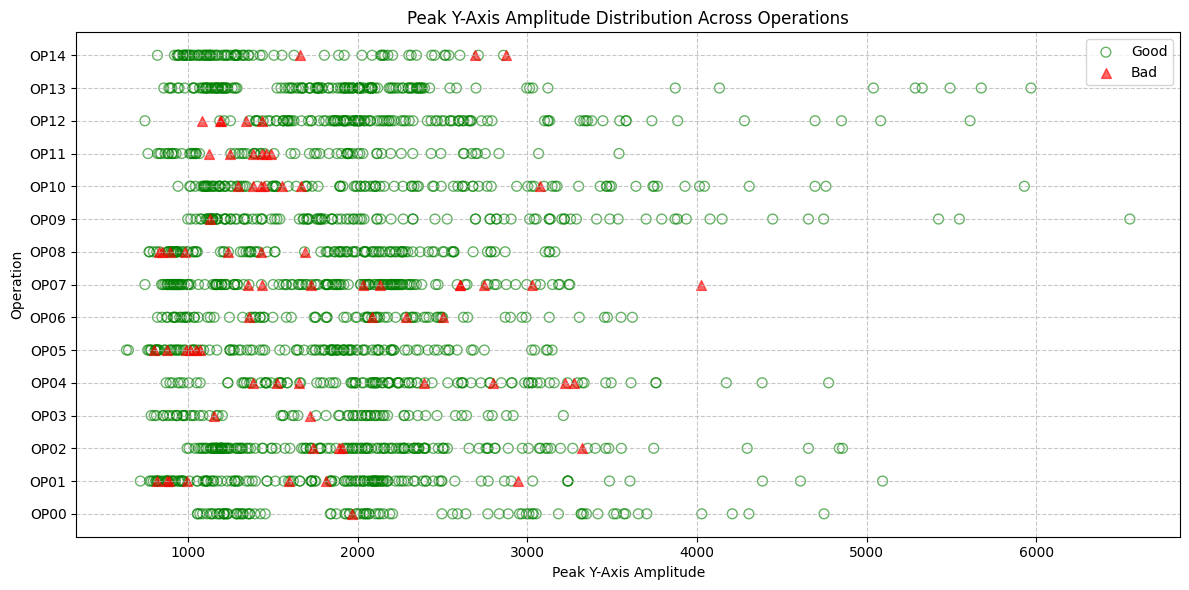


Peak Y-Axis Amplitude Across Different Operations:

Global Statistics:
  Good - Global Min: 636.00, Global Max: 6552.00
  Bad  - Global Min: 800.00, Global Max: 4026.00

Per Operation Statistics:
OP00:
  Good - Min: 1054.00, Max: 4749.00, Avg: 2185.48, Count: 83
  Bad  - Min: 1963.00, Max: 1963.00, Avg: 1963.00, Count: 1
OP01:
  Good - Min: 718.00, Max: 5094.00, Avg: 1773.55, Count: 136
  Bad  - Min: 817.00, Max: 2943.00, Avg: 1418.29, Count: 7
OP02:
  Good - Min: 993.00, Max: 4858.00, Avg: 2004.99, Count: 148
  Bad  - Min: 1735.00, Max: 3322.00, Avg: 2213.25, Count: 4
OP03:
  Good - Min: 782.00, Max: 3212.00, Avg: 1732.87, Count: 68
  Bad  - Min: 1151.00, Max: 1717.00, Avg: 1434.00, Count: 2
OP04:
  Good - Min: 870.00, Max: 4776.00, Avg: 2206.88, Count: 105
  Bad  - Min: 1385.00, Max: 3275.00, Avg: 2320.71, Count: 7
OP05:
  Good - Min: 636.00, Max: 3146.00, Avg: 1670.11, Count: 114
  Bad  - Min: 800.00, Max: 1069.00, Avg: 964.50, Count: 6
OP06:
  Good - Min: 819.00, Max: 3619.00, Avg

In [ ]:
# New Section: Check Y-Axis Amplitude Across Different Operations (Scatter Plot of Peak Amplitudes)

# Dictionary to store peak Y-axis amplitudes with good/bad distinction
operation_amplitudes = {op: {'good': [], 'bad': []} for op in process_names}

# Lists to store all amplitudes for global max/min calculation
all_good_amplitudes = []
all_bad_amplitudes = []

# Calculate peak Y-axis amplitudes and group by operation and label
for i, (sample, label) in enumerate(zip(X_data, y_data)):
    # Extract operation name from the label (e.g., "M01_Aug_2019_OP00_000_good" -> "OP00")
    operation = None
    for op in process_names:
        if op in label:
            operation = op
            break
    if operation is None:
        continue  # Skip if operation not found in label

    # Determine if good or bad from label
    quality = 'good' if 'good' in label.lower() else 'bad'

    # Calculate the maximum absolute amplitude of the Y-axis (column 1)
    peak_amplitude = np.max(np.abs(sample[:, 1]))  # Y-axis is the second column (index 1)
    operation_amplitudes[operation][quality].append(peak_amplitude)

    # Store amplitudes for global max/min
    if quality == 'good':
        all_good_amplitudes.append(peak_amplitude)
    else:
        all_bad_amplitudes.append(peak_amplitude)

# Calculate global max and min
global_max_good = max(all_good_amplitudes) if all_good_amplitudes else None
global_min_good = min(all_good_amplitudes) if all_good_amplitudes else None
global_max_bad = max(all_bad_amplitudes) if all_bad_amplitudes else None
global_min_bad = min(all_bad_amplitudes) if all_bad_amplitudes else None

# Prepare data for plotting
plt.figure(figsize=(12, 6))

# Plot individual peak amplitudes for each operation
y_positions = range(len(process_names))
for i, operation in enumerate(process_names):
    good_amplitudes = operation_amplitudes[operation]['good']
    bad_amplitudes = operation_amplitudes[operation]['bad']

    # Plot good amplitudes as green empty circles
    if good_amplitudes:
        plt.scatter(good_amplitudes, [i] * len(good_amplitudes),
                    facecolors='none', edgecolors='green', marker='o', s=50, alpha=0.6, label='Good' if i == 0 else None)

    # Plot bad amplitudes as red triangles
    if bad_amplitudes:
        plt.scatter(bad_amplitudes, [i] * len(bad_amplitudes),
                    color='red', marker='^', s=50, alpha=0.6, label='Bad' if i == 0 else None)

# Customize the plot
plt.yticks(y_positions, process_names)
plt.xlabel('Peak Y-Axis Amplitude')
plt.ylabel('Operation')
plt.title('Peak Y-Axis Amplitude Distribution Across Operations')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics for reference, including global max/min
print("\nPeak Y-Axis Amplitude Across Different Operations:")
print("\nGlobal Statistics:")
if all_good_amplitudes:
    print(f"  Good - Global Min: {global_min_good:.2f}, Global Max: {global_max_good:.2f}")
if all_bad_amplitudes:
    print(f"  Bad  - Global Min: {global_min_bad:.2f}, Global Max: {global_max_bad:.2f}")

print("\nPer Operation Statistics:")
for operation in process_names:
    good_amps = operation_amplitudes[operation]['good']
    bad_amps = operation_amplitudes[operation]['bad']

    if not (good_amps or bad_amps):
        print(f"{operation}: No data available")
        continue

    print(f"{operation}:")
    if good_amps:
        print(f"  Good - Min: {min(good_amps):.2f}, Max: {max(good_amps):.2f}, Avg: {np.mean(good_amps):.2f}, Count: {len(good_amps)}")
    if bad_amps:
        print(f"  Bad  - Min: {min(bad_amps):.2f}, Max: {max(bad_amps):.2f}, Avg: {np.mean(bad_amps):.2f}, Count: {len(bad_amps)}")

The scatter plot reveals a broad range of peak Y-axis amplitudes, from 636 to 6552, with bad samples (red triangles) frequently showing higher amplitudes, especially in operations like OP04 and OP07. Applying a logarithmic transformation compresses this range, aiming to make differences between good and bad samples more discernible, but no distinct patterns emerge to clearly differentiate them across operations. This suggests that further normalization or alternative preprocessing methods may be needed to better identify consistent features for distinguishing good and bad samples.

## Plot sample acceleration data


Total number of 'good' files: 1632
Total number of 'bad' files: 70
Total number of files: 1702
Plotting Good Sample 1 (Shape: (268288, 3)) - Label: M01_Aug_2019_OP00_000_good
Plotting Good Sample 2 (Shape: (49152, 3)) - Label: M02_Feb_2020_OP07_002_good
Plotting Good Sample 3 (Shape: (65536, 3)) - Label: M02_Feb_2021_OP14_014_good
Plotting Bad Sample 1 (Shape: (260000, 3)) - Label: M02_Feb_2021_OP00_000_bad
Plotting Bad Sample 2 (Shape: (34447, 3)) - Label: M02_Aug_2019_OP07_000_bad
Plotting Bad Sample 3 (Shape: (53041, 3)) - Label: M02_Feb_2019_OP14_001_bad


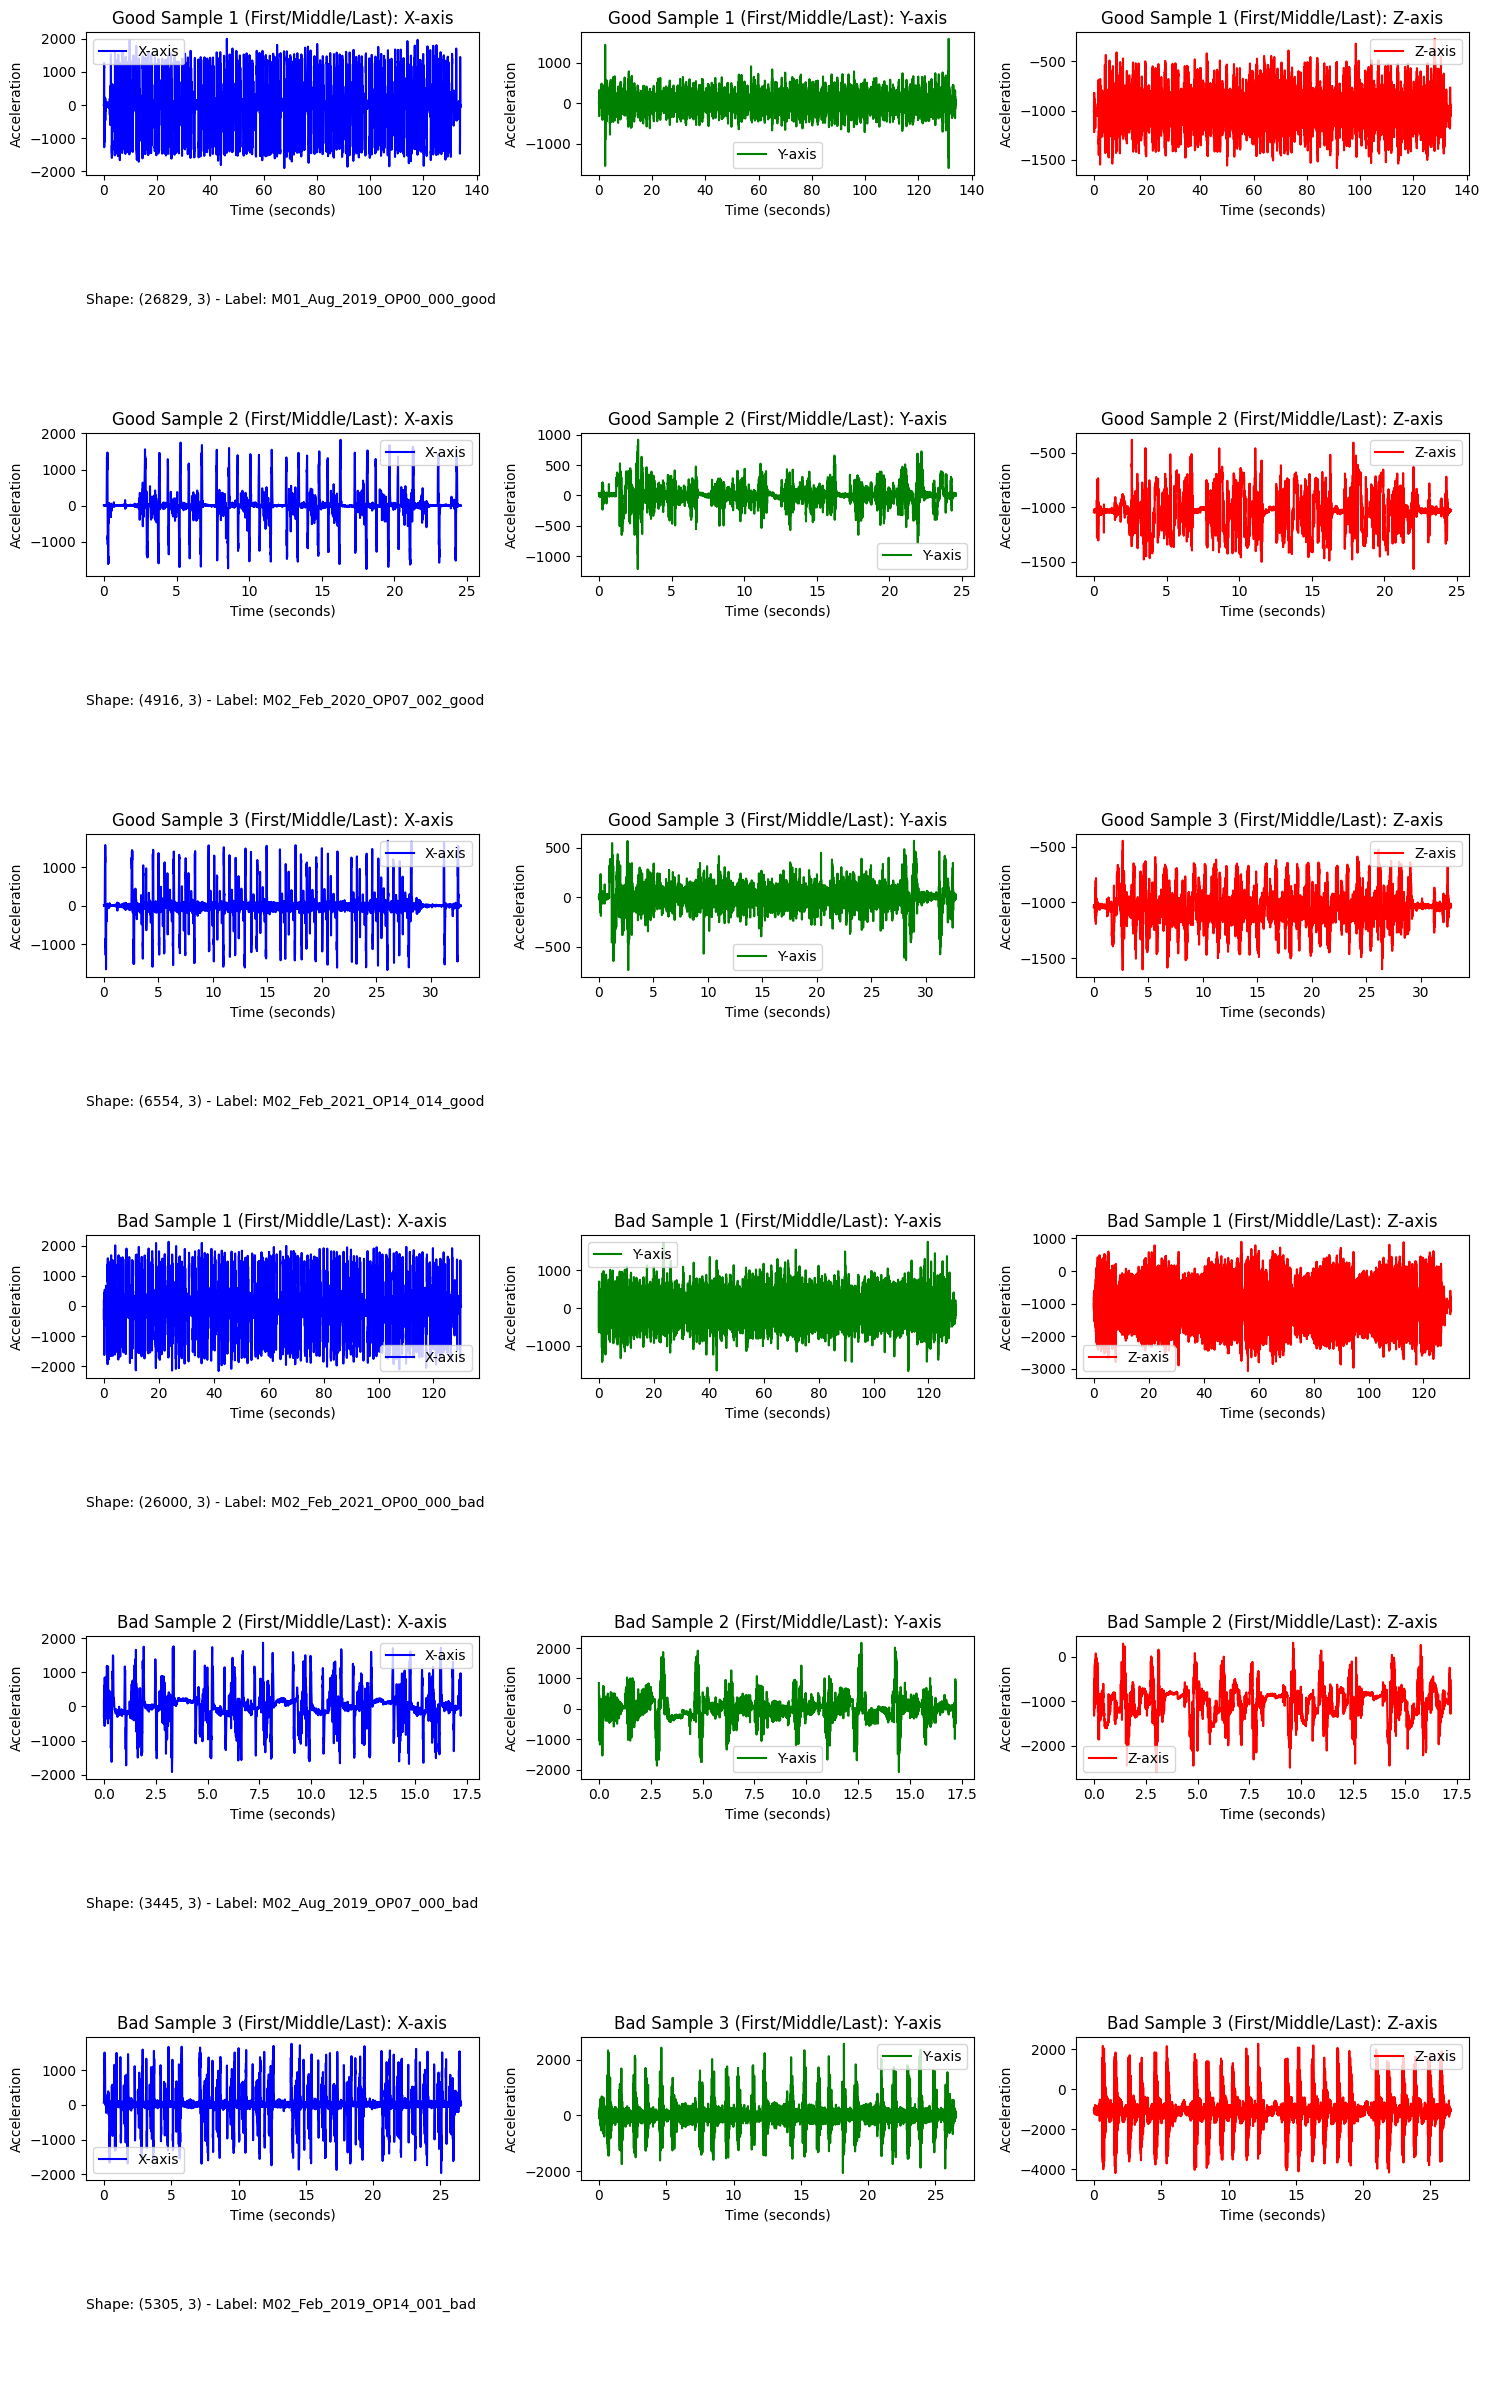

In [ ]:
# Assuming X_data and y_data are already loaded from Part 1

# Part 2a: Calculate the number of "good" and "bad" files
good_indices = [i for i, label in enumerate(y_data) if label.endswith("_good")]
bad_indices = [i for i, label in enumerate(y_data) if label.endswith("_bad")]

good_file_count = len(good_indices)
bad_file_count = len(bad_indices)

print(f"\nTotal number of 'good' files: {good_file_count}")
print(f"Total number of 'bad' files: {bad_file_count}")
print(f"Total number of files: {good_file_count + bad_file_count}")

# Part 2b: Plot first, middle, and last "good" and "bad" files with x-axis in seconds

# Select first, middle, and last "good" and "bad" samples
good_X_data = [X_data[i] for i in good_indices]
bad_X_data = [X_data[i] for i in bad_indices]

# Calculate indices for first, middle, last
num_good = len(good_X_data)
num_bad = len(bad_X_data)

good_selected_indices = [
    0,  # First
    num_good // 2,  # Middle
    num_good - 1  # Last
]
bad_selected_indices = [
    0,  # First
    num_bad // 2,  # Middle
    num_bad - 1  # Last
]

good_samples = [good_X_data[i] for i in good_selected_indices]
good_labels = [y_data[good_indices[i]] for i in good_selected_indices]
bad_samples = [bad_X_data[i] for i in bad_selected_indices]
bad_labels = [y_data[bad_indices[i]] for i in bad_selected_indices]

# Sampling frequency
sampling_rate = 2000  # 2 kHz (2000 samples per second)

# Plotting: 3 good + 3 bad = 6 samples, 2 rows per sample (1 for plot, 1 for text)
total_samples = 3 * 2  # 3 good + 3 bad
fig, axes = plt.subplots(2 * total_samples, 3, figsize=(15, 4 * total_samples))

# Plot "good" samples
for i, (sample, label) in enumerate(zip(good_samples, good_labels)):
    print(f"Plotting Good Sample {i+1} (Shape: {sample.shape}) - Label: {label}")
    # Downsample for plotting if too large
    downsample_factor = 10
    if len(sample) > 10000:
        sample = sample[::downsample_factor, :]  # Take every 10th sample to reduce density

    # Create time array in seconds
    n_samples = len(sample)
    time_seconds = np.arange(n_samples) * (downsample_factor / sampling_rate)

    # X-axis
    axes[i*2, 0].plot(time_seconds, sample[:, 0], label='X-axis', color='blue')
    axes[i*2, 0].set_title(f"Good Sample {i+1} (First/Middle/Last): X-axis")
    axes[i*2, 0].set_ylabel('Acceleration')
    axes[i*2, 0].set_xlabel('Time (seconds)')
    axes[i*2, 0].legend()
    # Y-axis
    axes[i*2, 1].plot(time_seconds, sample[:, 1], label='Y-axis', color='green')
    axes[i*2, 1].set_title(f"Good Sample {i+1} (First/Middle/Last): Y-axis")
    axes[i*2, 1].set_ylabel('Acceleration')
    axes[i*2, 1].set_xlabel('Time (seconds)')
    axes[i*2, 1].legend()
    # Z-axis
    axes[i*2, 2].plot(time_seconds, sample[:, 2], label='Z-axis', color='red')
    axes[i*2, 2].set_title(f"Good Sample {i+1} (First/Middle/Last): Z-axis")
    axes[i*2, 2].set_ylabel('Acceleration')
    axes[i*2, 2].set_xlabel('Time (seconds)')
    axes[i*2, 2].legend()

    # Add shape and label info below the plot
    axes[i*2+1, 0].text(0, 0.5, f"Shape: {sample.shape} - Label: {label}", fontsize=10)
    axes[i*2+1, 0].axis('off')
    axes[i*2+1, 1].axis('off')
    axes[i*2+1, 2].axis('off')

# Plot "bad" samples
for i, (sample, label) in enumerate(zip(bad_samples, bad_labels)):
    print(f"Plotting Bad Sample {i+1} (Shape: {sample.shape}) - Label: {label}")
    row = (3 * 2) + i*2  # Offset for bad samples (starts at row 6)
    # Downsample for plotting if too large
    downsample_factor = 10
    if len(sample) > 10000:
        sample = sample[::downsample_factor, :]  # Take every 10th sample to reduce density

    # Create time array in seconds
    n_samples = len(sample)
    time_seconds = np.arange(n_samples) * (downsample_factor / sampling_rate)

    # X-axis
    axes[row, 0].plot(time_seconds, sample[:, 0], label='X-axis', color='blue')
    axes[row, 0].set_title(f"Bad Sample {i+1} (First/Middle/Last): X-axis")
    axes[row, 0].set_ylabel('Acceleration')
    axes[row, 0].set_xlabel('Time (seconds)')
    axes[row, 0].legend()
    # Y-axis
    axes[row, 1].plot(time_seconds, sample[:, 1], label='Y-axis', color='green')
    axes[row, 1].set_title(f"Bad Sample {i+1} (First/Middle/Last): Y-axis")
    axes[row, 1].set_ylabel('Acceleration')
    axes[row, 1].set_xlabel('Time (seconds)')
    axes[row, 1].legend()
    # Z-axis
    axes[row, 2].plot(time_seconds, sample[:, 2], label='Z-axis', color='red')
    axes[row, 2].set_title(f"Bad Sample {i+1} (First/Middle/Last): Z-axis")
    axes[row, 2].set_ylabel('Acceleration')
    axes[row, 2].set_xlabel('Time (seconds)')
    axes[row, 2].legend()

    # Add shape and label info below the plot
    axes[row+1, 0].text(0, 0.5, f"Shape: {sample.shape} - Label: {label}", fontsize=10)
    axes[row+1, 0].axis('off')
    axes[row+1, 1].axis('off')
    axes[row+1, 2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

Plotting good and bad samples side by side in operation sequence reveals both differences and similarities, with bad samples often showing longer durations and more erratic acceleration patterns across X, Y, and Z axes. However, it remains difficult to confirm if these patterns are a reliable indicator or feature for distinguishing good versus bad samples across all operations. Additional analysis is needed to determine if extended durations and higher acceleration spikes consistently correlate with poor performance across various operations.

## Transform data to frequency domain

Plotting Good Data


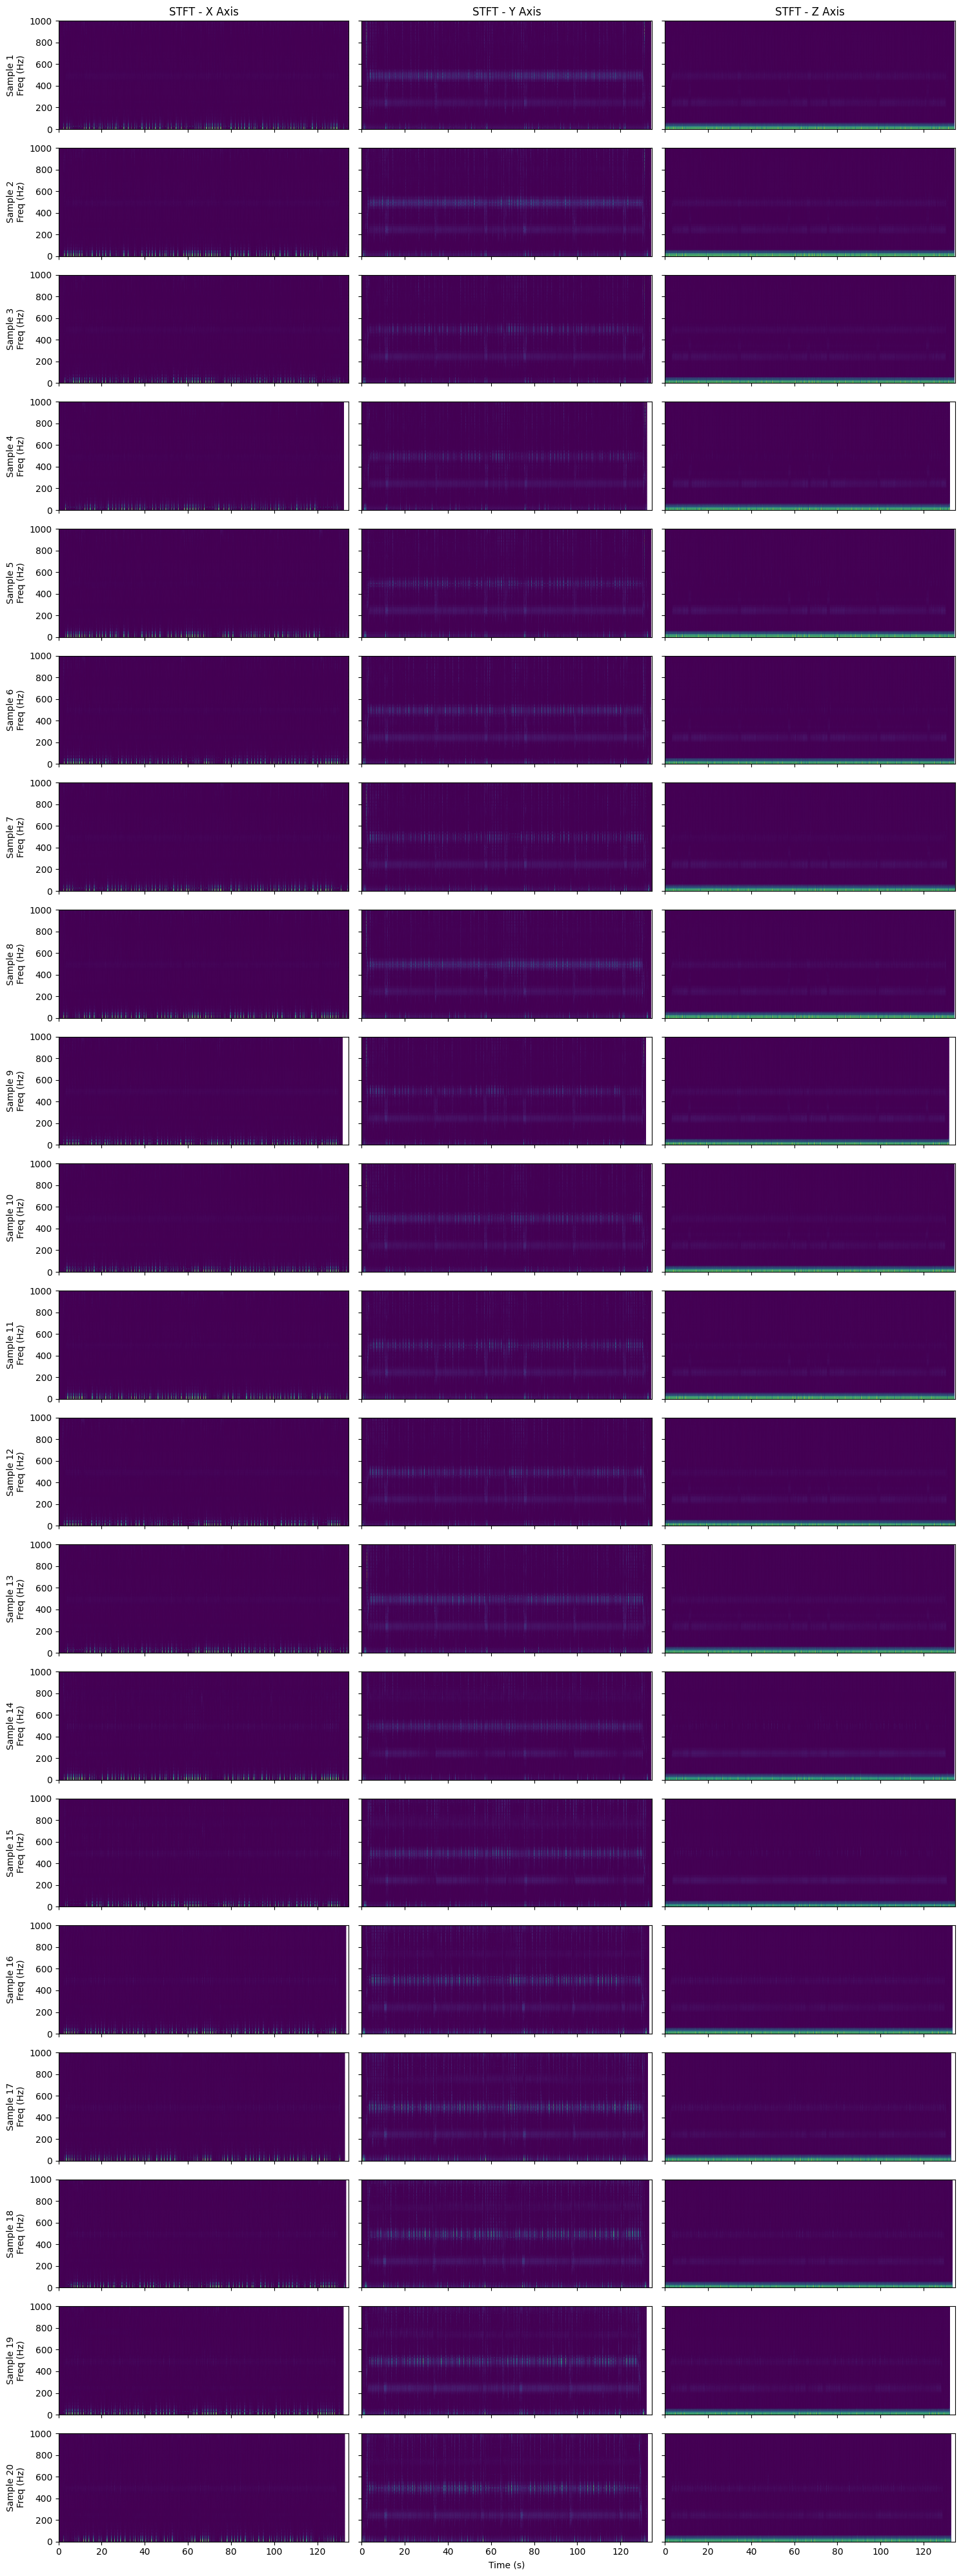

Plotting bad sample data


In [ ]:
def plot_stft(data):

    fs = 2000
    window_size = 64
    noverlap = window_size // 2 # Overlapping for smoother view


    num_samples = 20  # Number of samples to repeat the plots

    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 40), sharex=True, sharey=True)

    for sample_idx in range(num_samples):
        data_sample = data[sample_idx].T  # Transpose for X, Y, Z

        for i, (axis, label) in enumerate(zip(data_sample, ['X', 'Y', 'Z'])):
            f, t, Zxx = stft(axis, fs=fs, nperseg=window_size, noverlap=noverlap)

            # Plot Spectrogram
            ax = axes[sample_idx, i]
            ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
            ax.set_ylim(0, 1000)  # Limit to relevant frequencies

            if sample_idx == 0:  # Set titles only for the first row
                ax.set_title(f'STFT - {label} Axis')

            if i == 0:  # Set Y-label only for the first column
                ax.set_ylabel(f'Sample {sample_idx + 1}\nFreq (Hz)')

    axes[-1, 1].set_xlabel('Time (s)')  # Set x-label only at the bottom center
    plt.tight_layout()
    plt.show()




print ("Plotting Good Data")
plot_stft(good_X_data)


print("Plotting bad sample data")
plot_stft(bad_X_data)

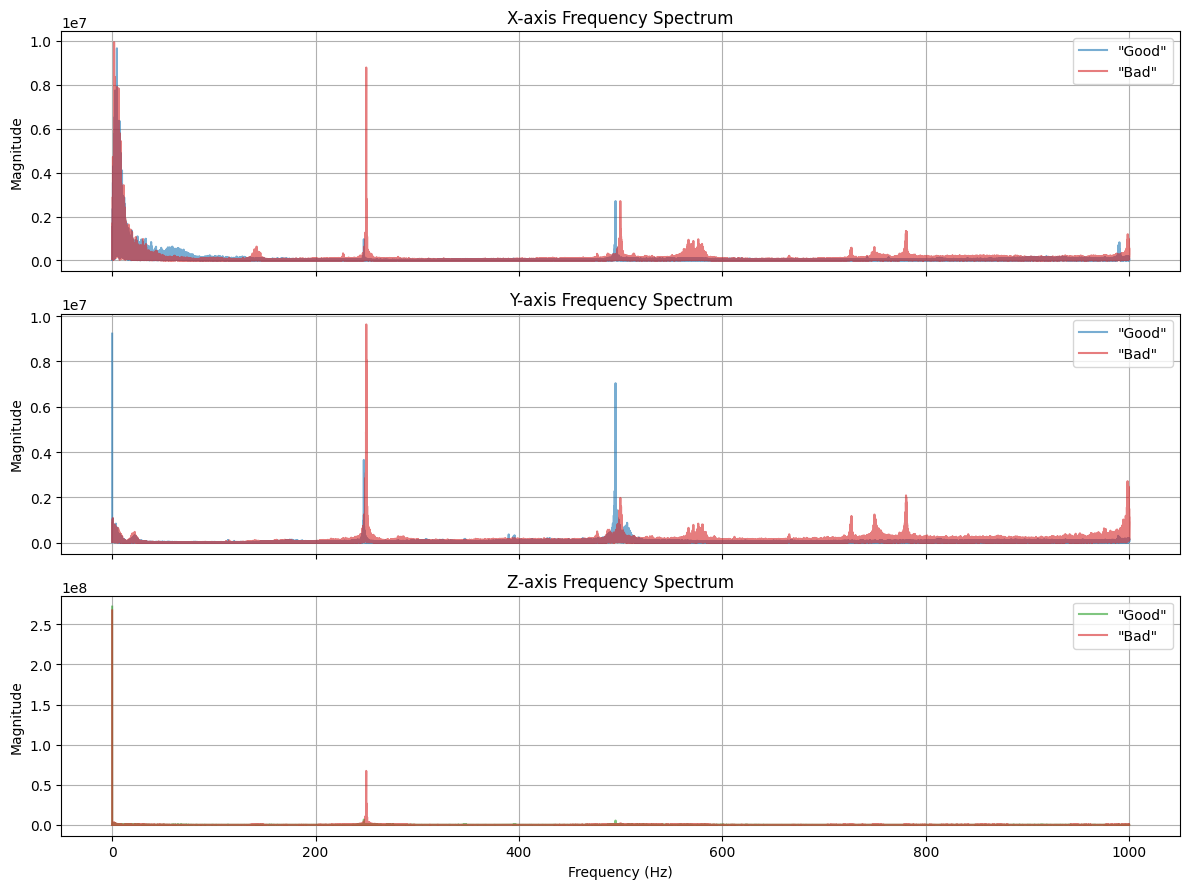

In [ ]:
def rfft_transformation(data):

    fs=2000

    sample_sensor_data = data[0]

    x = sample_sensor_data[:, 0]
    y = sample_sensor_data[:, 1]
    z = sample_sensor_data[:, 2]

    freqs = rfftfreq(len(x), d=1/fs)
    x_fft = np.abs(rfft(x))
    y_fft = np.abs(rfft(y))
    z_fft = np.abs(rfft(z))

    return x_fft, y_fft, z_fft, freqs

good_x_fft, good_y_fft, good_z_fft, good_freqs  = rfft_transformation(good_X_data)
bad_x_fft, bad_y_fft, bad_z_fft, bad_freqs = rfft_transformation(bad_X_data)


fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True)


axs[0].plot(good_freqs, good_x_fft, color='tab:blue', alpha=0.6, label='"Good"')
axs[0].plot(bad_freqs, bad_x_fft, color='tab:red', alpha=0.6, label='"Bad"')

axs[0].set_title('X-axis Frequency Spectrum')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(good_freqs, good_y_fft, color='tab:blue', alpha=0.6, label='"Good"')
axs[1].plot(bad_freqs, bad_y_fft, color='tab:red', alpha=0.6, label='"Bad"')
axs[1].set_title('Y-axis Frequency Spectrum')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(good_freqs, good_z_fft, color='tab:green', alpha=0.6, label='"Good"')
axs[2].plot(bad_freqs, bad_z_fft, color='tab:red', alpha=0.6, label='"Bad"')
axs[2].set_title('Z-axis Frequency Spectrum')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Magnitude')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

Looking at the magnitude of the different frequencies, it appears that certain frequencies have much higher magnitude in bad samples. This is clear when reviewing the STFT, which is plotting the frequencies over time, that certain frequencies for the bad samples are mor prominent. Looking at the RFFT charts, which distills the signal into its core frequencies, that the magnitude of frequencies like 230 is typically higher in bad samples. THis could be very helpful for helping the model identify issues in the opperation

## Chunking data approach

One approach to solving the issue of varying operation durations is to chunk the data into fixed windows of time.

In [ ]:
def chunk_time_series(X_data, y_data):
    """
    Process time series data with memory efficiency by:
    1. Calculating the most common length (with tie-breaker)
    2. Processing each series individually
    3. Using numpy views instead of copies where possible
    """
    # Find chunk size using smallest mode of lengths
    lengths = [len(ts) for ts in X_data]
    counts = Counter(lengths)
    max_count = max(counts.values(), default=0)
    mode_candidates = [l for l, cnt in counts.items() if cnt == max_count]
    chunk_size = min(mode_candidates) if mode_candidates else 0

    # Pre-allocate lists to store results (avoids incremental resizing)
    chunked_data = []
    chunked_labels = []

    for ts, lbl in zip(X_data, y_data):
        ts_len = ts.shape[0]  # Use shape[0] for 2D array length

        # Process based on length comparison to chunk_size
        if ts_len < chunk_size:
            # Symmetric padding with minimal memory
            pad_total = chunk_size - ts_len
            pad_left = pad_total // 2
            pad_right = pad_total - pad_left

            # Create padded array with optimized numpy operations
            padded = np.zeros((chunk_size, ts.shape[1]), dtype=ts.dtype)
            padded[pad_left:pad_left+ts_len] = ts
            chunked_data.append(padded)
            chunked_labels.append(lbl)

        elif ts_len == chunk_size:
            # Use original array view (no copy)
            chunked_data.append(ts)
            chunked_labels.append(lbl)

        else:
            # Generate overlapping chunks without full copy
            num_chunks = int(np.ceil(ts_len / chunk_size))
            starts = np.linspace(0, ts_len - chunk_size, num=num_chunks, dtype=int)

            # Create memory-efficient views
            for start in starts:
                chunk = ts[start:start+chunk_size]
                chunked_data.append(chunk)
                chunked_labels.append(lbl)

    return chunked_data, chunked_labels

In [ ]:
chunked_data, chunked_labels = chunk_time_series(X_data,y_data)

In [ ]:
len(chunked_data), len(chunked_labels)

(3582, 3582)


Duration Range for Good Data (seconds):
  Minimum: 32.77 seconds
  Maximum: 32.77 seconds
  Average: 32.77 seconds

Duration Range for Bad Data (seconds):
  Minimum: 32.77 seconds
  Maximum: 32.77 seconds
  Average: 32.77 seconds


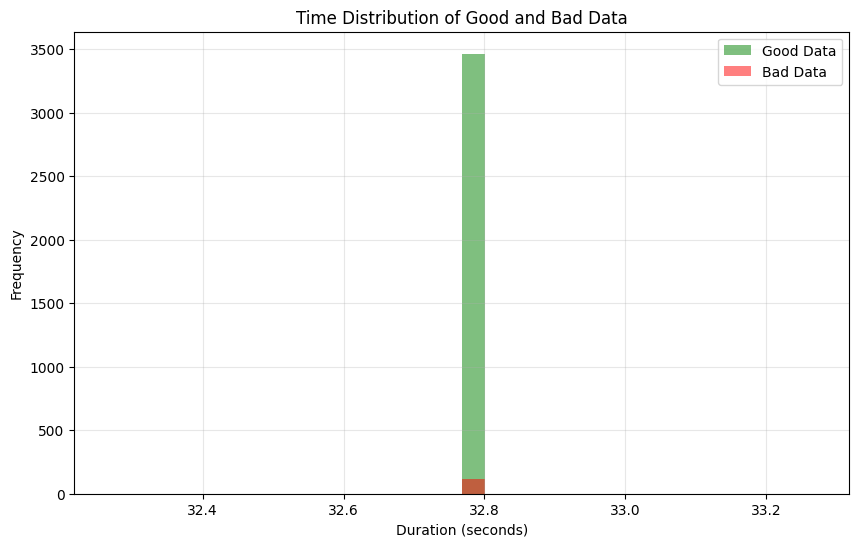

In [ ]:
sampling_rate = 2000  # 2 kHz (2000 samples per second)

# Separate good and bad data
good_indices = [i for i, label in enumerate(chunked_labels) if label.endswith("_good")]
bad_indices = [i for i, label in enumerate(chunked_labels) if label.endswith("_bad")]

good_X_data = [chunked_data[i] for i in good_indices]
bad_X_data = [chunked_data[i] for i in bad_indices]

# Calculate durations in seconds
good_durations = [len(sample) / sampling_rate for sample in good_X_data]
bad_durations = [len(sample) / sampling_rate for sample in bad_X_data]

# Compute min, max, and average durations
good_min_duration = min(good_durations) if good_durations else 0
good_max_duration = max(good_durations) if good_durations else 0
good_avg_duration = np.mean(good_durations) if good_durations else 0

bad_min_duration = min(bad_durations) if bad_durations else 0
bad_max_duration = max(bad_durations) if bad_durations else 0
bad_avg_duration = np.mean(bad_durations) if bad_durations else 0

# Print the results
print("\nDuration Range for Good Data (seconds):")
print(f"  Minimum: {good_min_duration:.2f} seconds")
print(f"  Maximum: {good_max_duration:.2f} seconds")
print(f"  Average: {good_avg_duration:.2f} seconds")

print("\nDuration Range for Bad Data (seconds):")
print(f"  Minimum: {bad_min_duration:.2f} seconds")
print(f"  Maximum: {bad_max_duration:.2f} seconds")
print(f"  Average: {bad_avg_duration:.2f} seconds")

# Plot the time distribution
plt.figure(figsize=(10, 6))
plt.hist(good_durations, bins=30, alpha=0.5, label='Good Data', color='green')
plt.hist(bad_durations, bins=30, alpha=0.5, label='Bad Data', color='red')
plt.title('Time Distribution of Good and Bad Data')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
len(good_indices), len(bad_indices)

(3465, 117)

# Baseline Model

In [2]:
# 🔧 Parameters
machines = ["M01", "M02", "M03"]
process_names = [f"OP{i:02d}" for i in range(15)]
labels = ["good", "bad"]
sampling_rate = 2000  # Hz
path_to_dataset = Path('/content/data').absolute()

In [3]:
# 📂 Load Function
def find_all_h5s_in_dir(s_dir):
    fileslist = []
    for root, _, files in os.walk(s_dir):
        for file in files:
            if file.endswith(".h5"):
                fileslist.append(os.path.join(root, file))
    return fileslist

In [4]:
# 📥 Load Raw Data
X_data = []
y_data = []
file_paths = []

for process_name, machine, label in itertools.product(process_names, machines, labels):
    data_path = path_to_dataset / machine / process_name / label
    if not data_path.exists():
        continue

    h5_files = find_all_h5s_in_dir(data_path)
    for file in h5_files:
        with h5py.File(file, 'r') as f:
            vibration_data = f['vibration_data'][:]
        X_data.append(vibration_data)
        y_data.append(label)
        file_paths.append(file)

print(f"Loaded {len(X_data)} samples with {len(y_data)} labels.")

Loaded 1702 samples with 1702 labels.


In [5]:
# 🔍 Heuristic Filter Function
def apply_heuristic_filter(vibration_data, amp_thresh=4750, dur_thresh=19.0, sampling_rate=2000):
    duration = len(vibration_data) / sampling_rate
    peak_y = np.max(np.abs(vibration_data[:, 1]))
    return 1 if (peak_y > amp_thresh) or (duration < dur_thresh) else 0

In [6]:
# 🧪 Convert Labels and Apply Heuristic Filter
# Convert string labels ("good", "bad") to numerical labels (0, 1)
true_labels = [0 if label == "good" else 1 for label in y_data]

# Apply heuristic filter to all samples
heuristic_preds = [apply_heuristic_filter(x) for x in X_data]

In [7]:
# 📊 Classification Metrics
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, heuristic_preds, labels=[0, 1])

# Display confusion matrix
print("=== Confusion Matrix ===")
print("Rows = Actual Labels, Columns = Predicted Labels")
print("       Predicted Good | Predicted Bad")
print(f"Actual Good     {conf_matrix[0, 0]:>5}          {conf_matrix[0, 1]:>5}")
print(f"Actual Bad      {conf_matrix[1, 0]:>5}          {conf_matrix[1, 1]:>5}")

# Display classification report
print("\n=== Classification Report ===")
print("This report summarizes the classification performance for each class:")
print(classification_report(true_labels, heuristic_preds,
                          labels=[0, 1],
                          target_names=["Good", "Bad"],
                          zero_division=0))

=== Confusion Matrix ===
Rows = Actual Labels, Columns = Predicted Labels
       Predicted Good | Predicted Bad
Actual Good      1604             28
Actual Bad         56             14

=== Classification Report ===
This report summarizes the classification performance for each class:
              precision    recall  f1-score   support

        Good       0.97      0.98      0.97      1632
         Bad       0.33      0.20      0.25        70

    accuracy                           0.95      1702
   macro avg       0.65      0.59      0.61      1702
weighted avg       0.94      0.95      0.94      1702



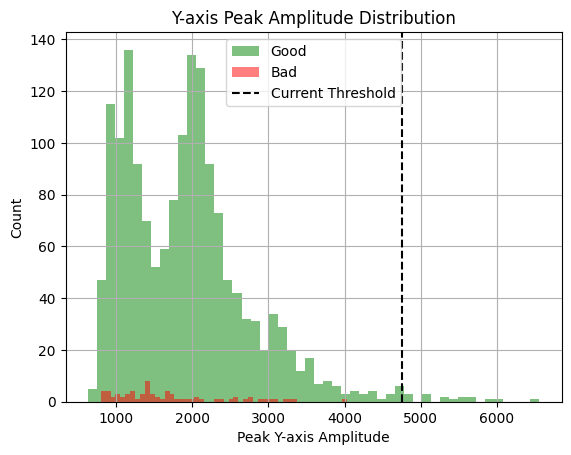

In [8]:
# 📈 Visualize Peak Y Amplitudes
good_peaks = [np.max(np.abs(x[:, 1])) for i, x in enumerate(X_data) if y_data[i] == "good"]
bad_peaks = [np.max(np.abs(x[:, 1])) for i, x in enumerate(X_data) if y_data[i] == "bad"]

plt.hist(good_peaks, bins=50, alpha=0.5, label='Good', color='green')
plt.hist(bad_peaks, bins=50, alpha=0.5, label='Bad', color='red')
plt.axvline(4750, color='black', linestyle='--', label='Current Threshold')
plt.xlabel("Peak Y-axis Amplitude")
plt.ylabel("Count")
plt.title("Y-axis Peak Amplitude Distribution")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 📈 Visualize Durations
good_durations = [len(x) / sampling_rate for i, x in enumerate(X_data) if y_data[i] == "good"]
bad_durations = [len(x) / sampling_rate for i, x in enumerate(X_data) if y_data[i] == "bad"]

plt.hist(good_durations, bins=50, alpha=0.5, label='Good', color='green')
plt.hist(bad_durations, bins=50, alpha=0.5, label='Bad', color='red')
plt.axvline(19.0, color='black', linestyle='--', label='Current Threshold')
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.title("Duration Distribution")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# 🔧 Threshold Optimization
best_f1 = 0
best_config = None

for amp_thresh in range(3000, 5000, 250):
    for dur_thresh in range(15, 35, 2):
        preds = [apply_heuristic_filter(x, amp_thresh, dur_thresh) for x in X_data]
        f1 = f1_score(true_labels, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_config = (amp_thresh, dur_thresh)

print(f"Best F1 for 'bad': {best_f1:.4f} at thresholds: amp={best_config[0]}, dur={best_config[1]}")

Best F1 for 'bad': 0.2500 at thresholds: amp=4750, dur=19


# Data Pipeline

## Supporting Functions

In [20]:
# 📂 Load Data
def load_clean_dataset():
    def find_all_h5s_in_dir(s_dir):
        fileslist = []
        for root, _, files in os.walk(s_dir):
            for file in files:
                if file.endswith(".h5"):
                    fileslist.append(os.path.join(root, file))
        return fileslist


    X_data = []
    y_data = []
    file_paths = []

    machines = ["M01", "M02", "M03"]
    process_names = [f"OP{i:02d}" for i in range(15)]
    labels = ["good", "bad"]
    sampling_rate = 2000  # Hz
    # path_to_dataset = Path("/content/data").absolute()
    path_to_dataset = Path("content/data").absolute()

    for process_name, machine, label in itertools.product(process_names, machines, labels):
        data_path = path_to_dataset / machine / process_name / label
        print(data_path)
        if not data_path.exists():
            continue

        h5_files = find_all_h5s_in_dir(data_path)
        for file in h5_files:
            with h5py.File(file, 'r') as f:
                vibration_data = f['vibration_data'][:]
            X_data.append(vibration_data)
            y_data.append(label)
            file_paths.append(file)

    print(f"Loaded {len(X_data)} samples with {len(y_data)} labels.")
    return X_data, y_data




In [21]:
def seperate_test_set(X_data, y_data):
    '''
        Breaks out the full operations without any chunking or preprocessing
    '''

    X, X_test, y, y_test = train_test_split(X_data, y_data, test_size=0.1, stratify=y_data)

    print(f'Number of test bad full opperations: {y_test.count("bad")}')
    print(f'Number of training and val bad full opperations: {y.count("bad")}')

    return X, X_test, y, y_test

In [22]:
def break_data_to_windows(X_data, y_data, window_size):

    def chunk_it(data,chunk_size):

        chunks = []
        for sample in data:
            # Trim to nearest multiple of the window size
            n_full_chunks = sample.shape[0] // chunk_size
            trimmed = sample[:n_full_chunks * chunk_size, :]
            trimmed = trimmed.reshape(n_full_chunks, chunk_size, 3)
            chunks.extend(trimmed)

        return np.array(chunks)

    good_x_data = [x for x,y in zip(X_data, y_data) if y == "good"]
    bad_x_data = [x for x,y in zip(X_data, y_data) if y == "bad"]

    good_chunks = chunk_it(good_x_data, chunk_size = window_size)
    bad_chunks = chunk_it(bad_x_data, chunk_size = window_size)

    y_good = np.zeros(len(good_chunks), dtype=int)
    y_bad = np.ones(len(bad_chunks), dtype=int)

    X_chunks = np.array(np.concatenate([good_chunks, bad_chunks], axis=0))
    y_chunks = np.array(np.concatenate([y_good, y_bad], axis=0))

    print(f"Shape of:\nGood chunks:{good_chunks.shape} , bad chunks {bad_chunks.shape} train/val chunks {X_chunks.shape})")

    return X_chunks, y_chunks

In [23]:
def extract_fft_features(chunks):
    fft_features = []
    for chunk in chunks:
        # rfft returns real-valued FFT (half-spectrum)
        fft_x = np.abs(rfft(chunk[:, 0]))
        fft_y = np.abs(rfft(chunk[:, 1]))
        fft_z = np.abs(rfft(chunk[:, 2]))

        # Concatenate features from x, y, z axes
        features = np.concatenate([fft_x, fft_y, fft_z])
        fft_features.append(features)

    fft_features = np.array(fft_features)
    print(f"X Type: {type(fft_features)} and shape {fft_features.shape}")

    return fft_features

In [24]:
def apply_scaling(X):
    print(X.shape)
    scaler = StandardScaler()
    if len(X.shape) == 3: # when scaling, scale each acceleration axis separetly
        n_samples, timesteps, n_features = X.shape
        X_2d = X.reshape(-1, n_features)
        X_scaled_2d = scaler.fit_transform(X_2d)
        X_scaled = X_scaled_2d.reshape(n_samples, timesteps, n_features)
    else:
        X_scaled = scaler.fit_transform(X)

    print(f"X Type: {type(X_scaled)} and shape {X_scaled.shape}")
    return X_scaled, scaler

In [25]:
def apply_PCA(X_scaled):
    pca = PCA(n_components=25)
    X_pca = pca.fit_transform(X_scaled)

    print(f"X Type: {type(X_pca)} and shape {X_pca.shape}")
    return X_pca, pca

In [26]:
def split_val(X_fft_chunks, y_chunks):
    X_train, X_val, y_train, y_val = train_test_split(X_fft_chunks, y_chunks, test_size=0.2, stratify=y_chunks)

    print(f"X Type: {type(X_train)} and shape {X_train.shape}")
    return X_train, X_val, y_train, y_val

In [27]:
def apply_SMOT(X_train, y_train):
    '''
        SMOT applies only on training, not validation or test sets

    '''
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    X_resampled = np.array(X_resampled).astype(np.float32)
    y_resampled = np.array(y_resampled).astype(np.int32)

    print("Original class distribution:", Counter(y_train))
    print("After SMOTE:", Counter(y_resampled))

    print(f"X Type: {type(X_resampled)} and shape {X_resampled.shape}")

    return X_resampled, y_resampled

In [28]:
def balance_with_weights(y):
    class_weights = dict(zip([0, 1], compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y)))
    return class_weights

In [29]:
def convert_to_tensor(X_train, y_train,X_val, y_val, batch):
    train_dataset = Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(batch).prefetch(tf.data.AUTOTUNE)
    val_dataset = Dataset.from_tensor_slices((X_val, y_val)).batch(batch).prefetch(tf.data.AUTOTUNE)

    return train_dataset, val_dataset

In [30]:
def generate_new_datasets(batch, chunks, apply_rfft, feature_reduction, balance_using_SMOT, good_only):
    scaler = None
    pca = None
    X_val_bad = None
    X_val = None

    print("Collecting fresh data set")
    X_data, y_data = load_clean_dataset()
    X, X_test, y, y_test = seperate_test_set(X_data, y_data)

    if chunks:
        window_size=2048
        print(f"\nBraking up dataset to chunks base on a window size of {window_size}")
        X, y = break_data_to_windows(X,y, window_size = window_size)

    if apply_rfft:
        print("\nExtracting RFFT features")
        X = extract_fft_features(X)


    print("\nApplying Standard Scaling")
    X, scaler = apply_scaling(X)

    if feature_reduction:
        print("\nApplying PCA")
        X, pca = apply_PCA(X)

    print("\nSplitting to training and validation with a 90/10 split")
    X_train, X_val, y_train, y_val = split_val(X, y)

    if balance_using_SMOT:
        print("\nApplying SMOT")
        X_train, y_train = apply_SMOT(X_train, y_train)

    if good_only:
        print("Seperating good samples from bad samples for Autoencoder training")
        X_val_bad = np.concatenate([X_train[y_train==1], X_val[y_val == 1]], axis=0)
        X_train = X_train[y_train==0]
        X_val = X_val[y_val==0]
        train_dataset, val_dataset = convert_to_tensor(X_train, X_train, X_val, X_val, batch=batch)
    else:
        train_dataset, val_dataset = convert_to_tensor(X_train, y_train, X_val, y_val, batch=batch)

    print("\n\nCalculating Class Weights")
    class_weights = balance_with_weights(y_train)

    training_shape = X_train.shape
    print(f"\nDataset ready for training with number of features of {training_shape}")

    metrics=['accuracy',
             Precision(name='precision'),
             Recall(name='recall'),
             AUC(name='auc')
              ]

    return {"train_dataset": train_dataset,
            "val_dataset": val_dataset,
            "training_shape": training_shape,
            "scaler": scaler,
            "pca": pca,
            "X_val_good": X_val,
            "X_val_bad": X_val_bad,
           "class_weights":class_weights,
           "metrics":metrics}   #Needed for identifying loss cuttoff of autoencoders


In [31]:
def train_load_model(model_name, train_model, dataset ):
    if os.path.exists(f"models/{model_name}.keras"):
        model = load_model(f"models/{model_name}.keras")
        with open(f"history/{model_name}.pkl", 'rb') as f:
            history = pickle.load(f)
    else:
        model, history = train_model(dataset)
        model.save(f"models/{model_name}.keras")
        with open(f"history/{model_name}.pkl", 'wb') as f:
            pickle.dump(history, f)

    return model, history

## Model Evaluation Functions

In [32]:
def plot_training(history, metric):

    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Training and Validation {metric}')
    plt.show()

In [33]:
def save_model_metrics(model_name, accuracy, precision, recall, f1, auc, filepath='results.csv'):

    new_data = pd.DataFrame([{
        'model_name': model_name,
        'accuracy': round(accuracy,4),
        'precision': round(precision,4),
        'recall': round(recall,4),
        'f1_score': round(f1,4),
        'auc': round(auc,4),
        'Comment':"",
    }])

    if os.path.exists(filepath):
        df = pd.read_csv(filepath)

        # Check if the model already exists in the dataframe and update its data if needed
        if model_name in df['model_name'].values:
            df.loc[df['model_name'] == model_name, ['accuracy', 'precision', 'recall', 'f1_score', "auc"]] = [
                round(accuracy,4), round(precision,4), round(recall,4), round(f1,4), round(auc,4)
            ]
        else:
            df = pd.concat([df, new_data], ignore_index=True)
    else:
        df = new_data

    df.to_csv(filepath, index=False)


In [34]:
def evaluate_classification_model(model, val_dataset, threshold, model_name):
    # Get the predicted probabilities for the validation set
    y_pred_prob  = model.predict(val_dataset)
    y_pred_prob = y_pred_prob.flatten()
    print("y_pred_prob")
    print(y_pred_prob.shape)

    # Extract true labels from val_dataset
    y_true = []
    for x_batch, y_batch in val_dataset:
        y_true.append(y_batch)
    y_true = np.concatenate(y_true, axis=0)


    # Make sure y_true is a 1D array
    y_true = y_true.flatten()  # Flatten in case it's not 1D
    print("y_true")
    print(y_true.shape)

    # Calculate AUC using the raw probabilities (not thresholded predictions)
    auc = roc_auc_score(y_true, y_pred_prob)

    # Convert probabilities to binary predictions based on a threshold of 0.5
    y_pred = (y_pred_prob >threshold).astype(int)

    # Calculate other metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    save_model_metrics(model_name, accuracy, precision, recall, f1, auc)

In [35]:
def evaluate_autoencoder_model(model, dataset, error_cutoff_percentile,model_name ):

    reconstructed_good = model.predict(dataset["X_val_good"])
    reconstructed_bad = model.predict(dataset["X_val_bad"])

    if len(dataset["X_val_good"].shape)==3:
        reconstruction_errors_good = np.mean(np.square(dataset["X_val_good"] - reconstructed_good), axis=(1, 2))
        reconstruction_errors_bad = np.mean(np.square(dataset["X_val_bad"] - reconstructed_bad), axis=(1, 2))
    else:
        reconstruction_errors_good = np.mean(np.square(dataset["X_val_good"] - reconstructed_good), axis=1)
        reconstruction_errors_bad = np.mean(np.square(dataset["X_val_bad"] - reconstructed_bad), axis=1)

    threshold = np.percentile(reconstruction_errors_good, error_cutoff_percentile)
    print(f"Threshold is: {threshold}")
    num_bad_below_threshold = np.sum(reconstruction_errors_bad < threshold)
    print(f"There are {num_bad_below_threshold} bad samples below the threshold out of a total of {len(reconstruction_errors_bad)}")
    num_good_above_threshold = np.sum(reconstruction_errors_good > threshold)
    print(f"There are {num_good_above_threshold} good samples above the threshold out of a total of {len(reconstruction_errors_good)}")

    plt.hist(reconstruction_errors_good, color="skyblue", bins=1000, alpha=0.5, label="Good Samples")
    plt.hist(reconstruction_errors_bad, bins=1000, color="red", alpha=0.5, label="Bad Samples")
    plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
    plt.xlim(0, 1)
    plt.legend()
    plt.show()


    # Combine good and bad errors
    all_errors = np.concatenate([reconstruction_errors_good, reconstruction_errors_bad])
    # Create true labels: 0 for good, 1 for bad
    true_labels = np.concatenate([np.zeros_like(reconstruction_errors_good), np.ones_like(reconstruction_errors_bad)])
    # Predicted labels based on threshold
    pred_labels = (all_errors > threshold).astype(int)

    # Metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels)
    recall = recall_score(true_labels, pred_labels)
    f1 = f1_score(true_labels, pred_labels)
    auc = roc_auc_score(true_labels, all_errors)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    save_model_metrics(model_name, accuracy, precision, recall, f1, auc)

# Demonstration Model

This model is only intended to test and demonstrate the data pipeline. Further modeling techiniques are being explored and will be included in milestone 5 to improve performance over the baseline.

## Autoencoder using ANN and RFFT

/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M01/OP00/good
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M01/OP00/bad
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M02/OP00/good
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M02/OP00/bad
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M03/OP00/good
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M03/OP00/bad
/shared/home/mae996/ondemand/data/sys/dashboard/batch_connect/sys/ood-jupyterlab-spack-conda/cs1090b/project/content/data/M01/OP01/good
/shared/home/mae996/ondemand/data/sys/dashboard/bat

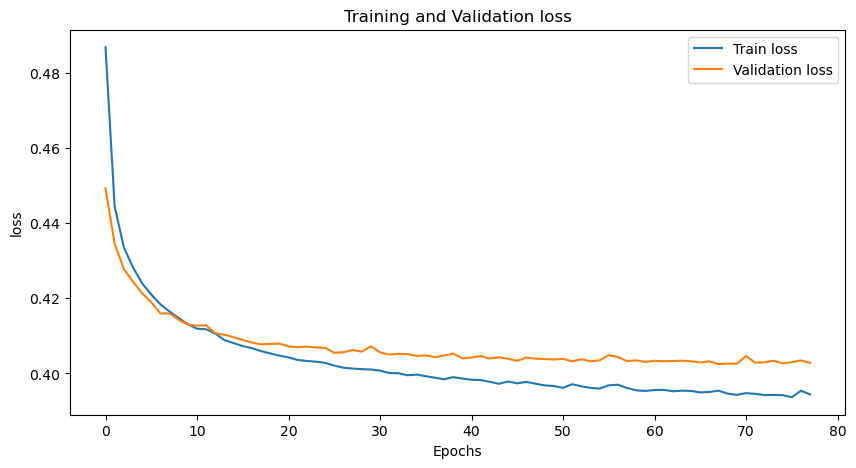

78/78 [==============================] - 0s 1ms/step
Threshold is: 1.220351800073976
There are 1644 bad samples below the threshold out of a total of 2485
There are 745 good samples above the threshold out of a total of 14891


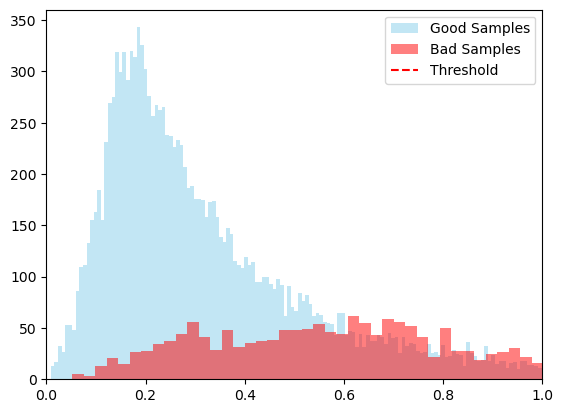

Accuracy: 0.8625
Precision: 0.5303
Recall: 0.3384
F1-Score: 0.4132
AUC: 0.8276


In [40]:
#Autoencoder model trained on RFFT date that is chunked into 1 sec increments
model_name = "autoencoder_ANN"


def train_model(dataset):

    model = Sequential([
    #Encoder
    Dense(2048, activation="relu",input_shape=(autoencoder_ANN_dataset["training_shape"][1],)),
    Dropout(0.2),
    Dense(1024, activation="relu"),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),

    #Decoder
    Dense(256, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1024, activation="relu"),
    Dropout(0.2),
    Dense(2048, activation="relu"),
    Dense(autoencoder_ANN_dataset["training_shape"][1], activation='linear'),
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mae')

    callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(dataset["train_dataset"],
                        validation_data=dataset["val_dataset"],
                        epochs=200,
                        callbacks = callback,
                        verbose=1)
    return model, history


autoencoder_ANN_dataset = generate_new_datasets(batch=128,
                                                chunks=True,
                                                apply_rfft=True,
                                                feature_reduction=False, # Disabeling PCA since autoencode already does its own dimentionality reduction
                                                balance_using_SMOT=False,
                                                good_only=True)

model, history = train_load_model(model_name, train_model, autoencoder_ANN_dataset)

plot_training(history, metric="loss")
evaluate_autoencoder_model(model, autoencoder_ANN_dataset, error_cutoff_percentile=95, model_name=model_name )